### In this assignment we have to:
- estimate the mean and variance of the absolute change in the daily stock price of German Stock Market and For Swiss Market Index 

- Estimate the overall mean and variance of the combined dataset DS1 U DS2

- Calculate the Skewness and Kurtosis of DS1

- Plot the dataset histogram and boxplot

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image # for ipython to display an image inline
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('EUstock.csv',index_col=0)

In [3]:
# German Stock market
DS1=df.DAX
# Swiss Stock market
DS2=df.SMI

In [4]:
# a function to get the absolute daily change of both markets
def get_abs_diff(ds):
    abs_diff=[]
    for i in range(1,len(ds)):
        abs_diff.append(abs(ds[i+1]-ds[i]))
    return pd.DataFrame(abs_diff)

# For DS1, estimate the mean and variance of the absolute change in the daily stock price (use for-loops)

### - Getting the absolute change in the daily stock price from day to the follow:

In [5]:
DS1=get_abs_diff(DS1)
DS2=get_abs_diff(DS2)

### - calculating the mean and variance:

In [6]:
ds1_mean=0
for i in range(0,len(DS1)):
    ds1_mean+= (DS1.loc[i])
ds1_mean=ds1_mean.item()/float(len(DS1))
print ("The mean of the daily change of DS1: ", ds1_mean)

The mean of the daily change of DS1:  20.220952124798256


In [7]:
ds1_var=0
for i in range(0,len(DS1)):
    ds1_var+=(DS1.loc[i]-ds1_mean)**2
ds1_var=ds1_var.item()/float(len(DS1)-1)
print ("The variance of the daily change of DS1: ",ds1_var)

The variance of the daily change of DS1:  651.2449109874791


# 2. Repeat for DS2

In [8]:
ds2_mean=0
for i in range(0,len(DS2)):
    ds2_mean+= (DS2.loc[i])
ds2_mean=ds2_mean.item()/float(len(DS2))
print ("The mean of the daily change of DS2: ", ds2_mean)

The mean of the daily change of DS2:  24.507584722969334


In [9]:
ds2_var=0
for i in range(0,len(DS2)):
    ds2_var+=(DS2.loc[i]-ds2_mean)**2
ds2_var=ds2_var.item()/float(len(DS2)-1)
print ("The variance of the daily change of DS2: ",ds2_var)

The variance of the daily change of DS2:  1005.9989575109836


# Estimate the overall mean and variance of the combined dataset DS1 U DS2

In [10]:
ds1_len=len(DS1)
ds2_len=len(DS2)
combined_mean_ds=(ds1_len*ds1_mean+ds2_len*ds2_mean)/(ds1_len+ds2_len)
print ("Mean of the combined dataset: ",combined_mean_ds)

Mean of the combined dataset:  22.364268423883793


### The Variance

### using the equation: To calculate the combined v:

(n1-1)*(variance1)+(n2-1)*(variance2) divided by (n1+n2-2)

In [11]:
combined_variance1=((ds1_len-1)*(ds1_var)+(ds2_len-1)*(ds2_var))/(ds1_len+ds2_len-2)
print ("Combined variance using equation from method 1: ",combined_variance1)

Combined variance using equation from method 1:  828.6219342492313


In [12]:
combined_variance4=(((ds1_len-1)*(ds1_var)+(ds2_len-1)*(ds2_var)+ds1_len*(ds1_mean-combined_mean_ds)**2+ds2_len*(ds2_mean-combined_mean_ds)**2)/(ds1_len+ds2_len-1)) 
print ("Combined variance using equation from method 2: ",combined_variance4)

Combined variance using equation from method 2:  832.9940472854752


#### However pandas variance of the combined ds is near to the first eqn.

In [13]:
print("Pandas result: ",DS1.append(DS2).var()[0])

Pandas result:  832.994047285


# 4. Calculate the Skewness and Kurtosis of DS1

### using the below equation for kut

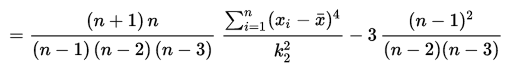

In [14]:
Image(filename='kurtosis-wiki.png') 

In [15]:
kurtosis_ds1=0
for i in range(0,len(DS1)):
    kurtosis_ds1+=((DS1.loc[i]-ds1_mean)**4) 
nfac=(len(DS1)*(len(DS1)+1))/(float((len(DS1)-1)*(len(DS1)-2)*(len(DS1)-3)))
kurtosis_ds1=kurtosis_ds1/float(ds1_var**(2))*nfac
n=ds1_len
se=-3.0*(n-1)**2/((n-3)*(n-2))
kurtosis_ds1=kurtosis_ds1.item()+se


In [16]:
print ("Kurtosis function result: ",kurtosis_ds1)

Kurtosis function result:  10.688051580592592


### same as the pandas funciton kurtosis

In [17]:
print("kurt fun from pandas, just to make sure: " ,DS1.kurt()[0])

kurt fun from pandas, just to make sure:  10.6880515806


### or the one in the lecture below

In [18]:
kurtosis_ds1=0
for i in range(0,len(DS1)):
    kurtosis_ds1+=((DS1.loc[i]-ds1_mean)**4) 
nfac=(len(DS1)*(len(DS1)+1))/(float((len(DS1)-1)*(len(DS1)-2)*(len(DS1)-3)))
kurtosis_ds1=kurtosis_ds1.item()/float(ds1_var**(2))*nfac



In [19]:
print ("Kurtosis function from the Lecture: ",kurtosis_ds1)

Kurtosis function from the Lecture:  13.692901588948674


### it is different from pandas kurt function

## skewness


In [20]:
skewness=0
for i in range(0,len(DS1)):
    skewness+=((DS1.loc[i]-ds1_mean))**3
nfac=len(DS1)/float((len(DS1)-1)*(len(DS1)-2))
skewness=skewness.item()/float(ds1_var**(3/2.0))*nfac

In [21]:
print ("Skewness: ",skewness)

Skewness:  2.856066925799168


# 5. Plot Histogram and Box Plot of the combined dataset

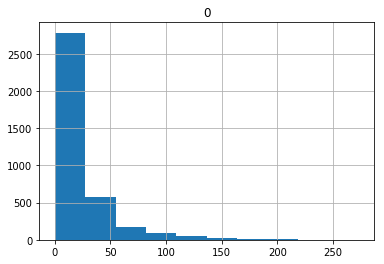

In [22]:
(DS1.append(DS2,ignore_index=True)).hist()
plt.show()

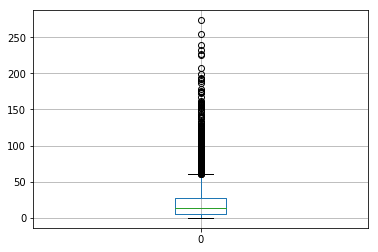

In [23]:
pd.DataFrame(DS1.append(DS2,ignore_index=True)).boxplot()
plt.show()